# 7.나랑 닮은 연예인은 누구?

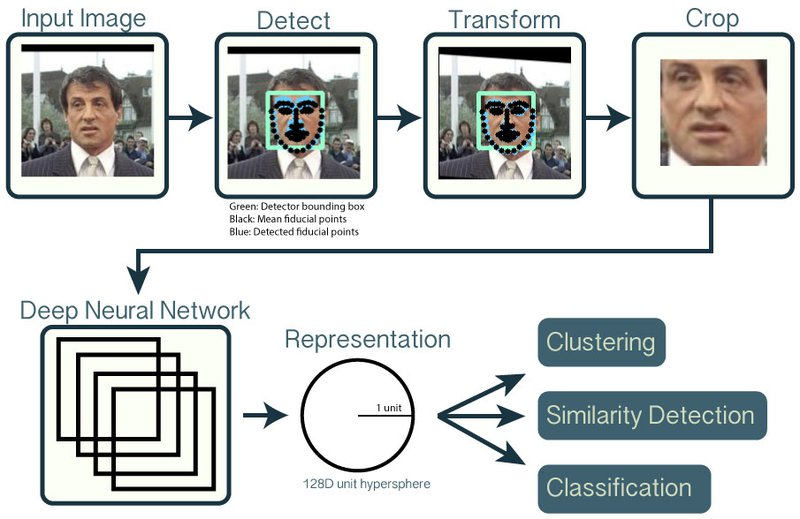

# Step0. 개발환경 조성


### 패키지 다운로드
```
$ pip install cmake
$ pip install dlib
$ pip install face_recognition --user
```

### 폴더 설정
```
$ mkdir -p ~/aiffel/face_embedding/celebrity

~/aiffel/face_embedding/celebrity 에 저장

```

# Step1. 사진 모으기


1. 내 사진 찍기

내 사진을 2장 이상 포함합시다.

2. 비교할 연예인 사진 모으기

많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아질 것입니다.
주위의 동료들과 모은 사진을 주고받는 것도 하나의 방법입니다.


# Step2. 얼굴 영역 자르기

```
dir_path        이미지's폴더경로
file_list       이미지명파일 리스트

```

#### 이미지파일 출력

In [1]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)
print(type(file_list))
print ("file_list: {}".format(file_list))

<class 'list'>
file_list: ['김희철.jpg', '수지.jpg', '서강준.jpg', '조승우.jpeg', 'RM.jpg', '이안 굿펠로우.jpg', '저스틴 존슨.jpeg', '톰 홀랜드.jpg', '김C.jpeg', '곽도원.jpg', '사무엘 L 잭슨.jpg', '손예진.jpeg', '태양.jpeg', '백현.jpg', '윤도현.png', '강민경.jpg', '제니.jpg', '존 파브르.jpeg', '정민철.jpg', '아이즈원김채원.jpg', '하정우.jpg', '트와이스모모.jpeg', '박보영.jpg', '김상호.png', '이승기.jpeg', '문별.jpg', '박진영.jpeg', '조정치.jpg', '수호.jpg', '황정민.jpg', '신비.jpg', '마크 러팔로.jpeg', '슈가.jpg', '류승룡.jpeg', '이정재.jpeg', '이연걸.jpeg', '크리스 햄스워스.jpg', '박찬호.jpg', '뷔.png', '지디.jpg', '박명수.jpg', '제이크 질렌할.jpeg', '지호.jpg', '레인보우재경.jpg', '씨잼.jpg', '꽈두룹.jpeg', '최현석.jpg', '아이즈원조유리.jpeg', '박나래.jpeg', '최양락.jpg', '러블리즈예인.jpg', '리아.jpg', '박희순.jpg', '이승철.jpeg', '디오.jpeg', '김광현.jpg', '트와이스정연.jpg', '우기.jpg', '노홍철.jpeg', '잇섭.png', '레오나르도 디카프리오.jpeg', '이천수.jpg', '이제훈.jpeg', '택연.jpg', '류진.jpg', '유리.jpg', '오재원.jpg', '트와이스사나.jpg', '서장훈.jpg', '유지태.jpg', '개코.jpeg', '공효진.jpg', '이명박.jpg', '이동국.jpeg', '리사.jpg', '사쿠라.jpg', '고창석.jpeg', '윤균상.jpg', '김래원.jpeg', '이승환.jpg', '온앤오프라운.jpg', '제이콥 배털론.jpg', '잭 

### get_cropped_face함수
```

이미지경로 인자로 받아서 crop 리턴
image           : 이미지's의 원본사진 임시저장
face_locations  : 상좌,상우,하좌,우와 좌표 리스트 저장(사진속 얼굴을 detection하여 얼굴의 상좌,상우,하좌,하우)

간혹의 이미지의 face_locations을 못가져오는경우가 있는데 이를 대바하여
if len(face_locations) == 0 : return []를 추가하자.


```

In [2]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image) # face_locations 리스트형
    if len(face_locations) == 0 : return []
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:] # cropped_face 이미지형으로 저장
    return cropped_face


# Step3. 얼굴 영역의 임베딩 추출하기

### def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
### def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
```
def get_face_embedding(crop이미지)를 활용하여 crop의 이미지를 128차원의 수로 표현하였다.(임베딩 벡터)

```

# get_gropped_face 함수(임베딩벡터 만들기)

face_recognition를 사용하여 128차원의 페이스에대한 인베딩벡터를 리턴한다.

In [3]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face): # face= crop
    return face_recognition.face_encodings(face)

### 특정파일에 대한 임베딩값 확인하기

In [4]:
image_file = os.path.join(dir_path, '태연.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현),# 얼굴이미지 리턴

embedding = get_face_embedding(face)  
embedding

[array([-0.05832611,  0.08650121,  0.09609314, -0.08645427, -0.04536815,
         0.00911583, -0.09041593, -0.083923  ,  0.13654682, -0.16282591,
         0.23101933, -0.06544134, -0.22658628, -0.0451633 , -0.05203072,
         0.19644116, -0.17820568, -0.14273839, -0.03521199,  0.02405678,
         0.10089701,  0.07277459, -0.01784261,  0.01457554, -0.12162289,
        -0.30795228, -0.09869153, -0.027395  , -0.04413068, -0.10291066,
        -0.05202296,  0.06361919, -0.18417709,  0.02716298, -0.00758901,
         0.12781557,  0.00935094, -0.08867297,  0.14594853,  0.01699896,
        -0.28937352,  0.10548922,  0.02909858,  0.23222357,  0.16457024,
        -0.03816761, -0.01715928, -0.1753045 ,  0.08326229, -0.13974187,
         0.03850684,  0.16461825,  0.06933422,  0.06771764,  0.00946827,
        -0.11631443,  0.03686657,  0.08126064, -0.12411997, -0.03522221,
         0.09706895, -0.08108591,  0.03647789, -0.10451367,  0.11921875,
         0.05328177, -0.08073267, -0.23669644,  0.0

# def get_face_embedding_dict(dir_path) (이미지:임베딩벡터 딕셔너리 만들기 ) 
```
dir_path 경로에 있는 이미지파일를 dic형태로 변환
key:이미지명
value : 임베딩 벡터
embedding_dict 딕셔너리 생성

```

In [5]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if len(face) == 0: continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

# embedding_dict 생성

In [6]:
embedding_dict = get_face_embedding_dict(dir_path)

In [7]:

for i in embedding_dict:
    print(i, end=' ')




김희철 수지 서강준 조승우 RM 이안 굿펠로우 저스틴 존슨 톰 홀랜드 김C 곽도원 손예진 태양 백현 윤도현 강민경 제니 존 파브르 정민철 아이즈원김채원 하정우 트와이스모모 박보영 김상호 이승기 문별 박진영 조정치 수호 황정민 마크 러팔로 슈가 류승룡 이정재 이연걸 크리스 햄스워스 박찬호 뷔 지디 박명수 제이크 질렌할 지호 레인보우재경 씨잼 꽈두룹 최현석 아이즈원조유리 박나래 최양락 러블리즈예인 리아 박희순 이승철 디오 김광현 트와이스정연 우기 노홍철 잇섭 레오나르도 디카프리오 이천수 이제훈 택연 류진 유리 오재원 트와이스사나 서장훈 유지태 개코 공효진 이명박 이동국 리사 사쿠라 고창석 윤균상 김래원 온앤오프라운 제이콥 배털론 잭 니콜슨 트와이스쯔위 김대중 김남주 안재홍 이성민 이범수 박성호 정수빈 강미나 아놀드 슈워제네거 이진호 류현진 지민(BTS) 홍구 유노윤호 최준석 손호준 정국 문재인 로저 무어 백윤식 박재범 clinton 트와이스나연 세훈 마동석 박찬욱 슬기 이종석 이준혁 유희열 차명석 트와이스미나 아린 이희준 유아 obama 주진모(올드) 조인성 한석규 biden 진 레드벨벳웬디 방시혁 성시경 권현빈 유재석 김유정 찬열 이용진 여자아이들수진 서현진 노무현 아이즈원민주 trump 지드래곤 류승범 피어스 브로스넌 이민호 잭 블랙 대도서관 크리스 에반스 지수 조정석 김고은 한기범 이재용 크리스탈 박완규 장동건 김종서 배성우 온앤오프효진 차두리 딕헌터 도지한 공유 돈스파이크 로제 주호민 장도연 정준하 솔라 박항서 첸 러블리즈지수 숀 코네리 윤종신 삭제요망2 비니 하승진 류준열 김현수 강동원 장원영 아이유 신동엽 슈퍼비 잭 스페이더 배성재 차승원 제프리 힌턴 리암 니슨 이영하 박정민 b1a4진영 슬리피 앤드류 응 김윤석 나인뮤지스경리 스윙스 잇지유나 정형돈 하현우 김민재 윤경신 박용택 줄리엔강 티모시 달튼 티파니 조이 박신양 다니엘 크레이그 기성용 최무성 이경규 손흥민 bush 성룡 이효리 김경진 김영삼 클린트 이스트우드 장성호 장원준 로다주 이광수 시우민 트

# 이미지 딕셔너리 만들기 & crop이미지 파일저장

```
img_dict 생성  (이미지형: 이미지형태)
-> 이방법은 crop사진을 메모리에 다 올리는 방법인데 그렇게 좋은 방법은 아닌것 같다.
/aiffel/face_embedding/celebrity_crop 경로에 jpeg파일 저장

```

In [8]:
from PIL import Image

crop_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity_crop'

def get_face_img_dict(dir_path):
    file_list = os.listdir(dir_path)
    img_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if len(face) == 0: continue
        #embedding = get_face_embedding(face)
        #if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
        crop = Image.fromarray(face)
        new_path=crop_path+'/'+os.path.splitext(file)[0]+'.jpeg'
        crop.save(new_path) 
        img_dict[os.path.splitext(file)[0]] = crop
        
    return img_dict
        

In [9]:
img_dict = get_face_img_dict(dir_path)



<PIL.Image.Image image mode=RGB size=74x75 at 0x7FC2D0B15C90>


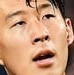

In [10]:
print(img_dict['손흥민'])
img_dict['손흥민']



<PIL.Image.Image image mode=RGB size=89x90 at 0x7FC2D0B10710>


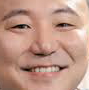

In [11]:
print(img_dict['주호민'])
img_dict['주호민']



갓상민
<PIL.Image.Image image mode=RGB size=154x155 at 0x7FC2D0B02D90>


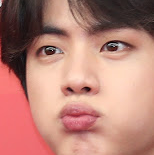

In [55]:
print('갓상민')
print(img_dict['진'])
img_dict['진']

# 임베딩값 자료구조 만들기

In [12]:
#embedding_list 128차원인 임베딩 값이 이미지갯수 만큼 원소로 들어감
#embedding_array 128차원인 임베딩 값이 np자료형의 배열로 구성됨
# 파이썬 코딩 연습 /
import numpy as np

embedding_list=[]

for key,value in embedding_dict.items():
    embedding_list.append(value)
    
embedding_array=np.array(embedding_list)
print(embedding_array.shape)
# embedding_array 굳이 만들필요 없다 사용안함

(269, 128)


# L2 Norm Distance 연산
numpy.linalg.norm를 활용하여 L2 Norm Distance로 계산합니다. 

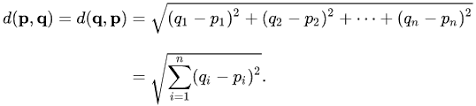

## get_distance함수

In [13]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [14]:
get_distance('주호민','고창석')

0.6311217665636645

In [15]:
get_distance('주호민','장동건')

0.6283370644854376

In [16]:
get_distance('삭제요망1', '손흥민')

0.4731139321815461

In [17]:
get_distance('삭제요망2', '손흥민')

0.5038098004143139

In [18]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1): #
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('잭 블랙') 
print(sort_key_func)
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

<function get_sort_key_func.<locals>.get_distance_from_name1 at 0x7fc2d0aa9f80>


In [19]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('잭 블랙',
  array([-0.09252088,  0.07980142,  0.05155606, -0.07903208, -0.13039863,
         -0.15645367,  0.0182594 , -0.06059149,  0.10699864, -0.04888671,
          0.19335862, -0.00912242, -0.29922873, -0.05769095,  0.03686775,
          0.07503095, -0.10168506, -0.07246301, -0.09316389, -0.08245218,
          0.09549789,  0.03870981,  0.06357286,  0.08616904, -0.12128049,
         -0.31491679, -0.09503096, -0.05786498,  0.00141682, -0.10084015,
          0.03829998,  0.08775527, -0.1460242 , -0.06572852,  0.00516636,
          0.07788519, -0.10268317, -0.11640239,  0.16096231,  0.02154588,
         -0.11451235, -0.10404531, -0.03439004,  0.28552565,  0.11495703,
         -0.06642754,  0.11749114, -0.09069028,  0.10341425, -0.24354927,
         -0.00808124,  0.14909852,  0.04916679,  0.04988394,  0.15401268,
         -0.06927228,  0.13845405,  0.16475889, -0.25305969,  0.04860152,
          0.08990979, -0.05074739, -0.01853584, -0.09906518,  0.16482261,
          0.05114045, -0.080

In [20]:
def get_nearest_face(name, top=6):

    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [21]:
get_nearest_face('삭제요망1')

순위 1 : 이름(삭제요망2), 거리(0.29941478065279215)
순위 2 : 이름(박건우), 거리(0.374078138177132)
순위 3 : 이름(박성호), 거리(0.3874253565422023)
순위 4 : 이름(박명수), 거리(0.3885813858276938)
순위 5 : 이름(하현우), 거리(0.4002313597173985)
순위 6 : 이름(조정치), 거리(0.40399051549076054)


In [22]:
get_nearest_face('삭제요망2')

순위 1 : 이름(삭제요망1), 거리(0.29941478065279215)
순위 2 : 이름(박건우), 거리(0.3807522920964473)
순위 3 : 이름(윤균상), 거리(0.38652738811199694)
순위 4 : 이름(온앤오프라운), 거리(0.38785805959747083)
순위 5 : 이름(박명수), 거리(0.39072789823849435)
순위 6 : 이름(권현빈), 거리(0.39463213431863575)


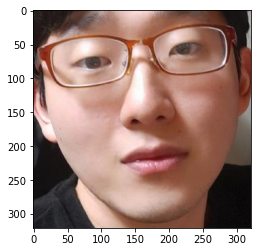

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(img_dict['삭제요망1']) 

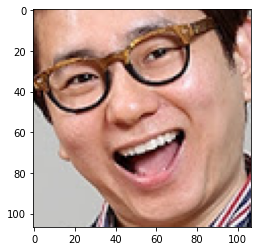

In [26]:
plt.imshow(img_dict['박성호']) 

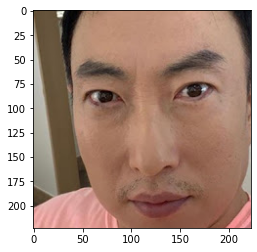

In [27]:
plt.imshow(img_dict['박명수']) 

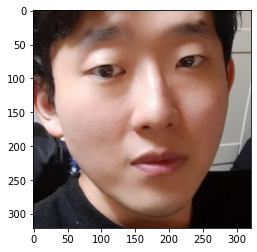

In [28]:
plt.imshow(img_dict['삭제요망2']) 

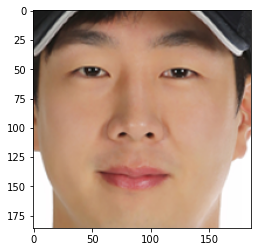

In [29]:
plt.imshow(img_dict['박건우']) 

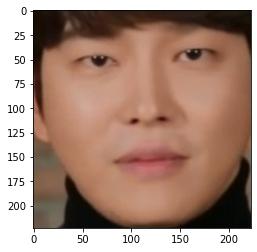

In [30]:
plt.imshow(img_dict['윤균상']) 

```
def get_gropped_face(image_file)      : 이미지 파일에서 얼굴 영역을 가져오는 함수
def get_face_embedding(face)          : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
def get_face_img_dict(dir_path):      ' 이미지를 호출할수 있는 딕셔너리함수 + crop된 파일저장하는 기능 
def get_distance(name1, name2)        : 두 이미지(사람 이름) 사이의 임베딩 벡터 거리를 구하는 함수
                                        (np.linalg.norm(임데딩벡터1-임베딩벡터2, ord=2))
def get_nearest_face(name, top=5):    : name에 대한 닮은꼴 5위 출력하는 함수

dir_path        : 이미지경로   
file_list       : 이미지명.확장자 리스트
embedding_dict  : 딕셔너리(이미지명:임베딩벡터)
img_dict        : 딕셔너리(이미지명:이미지)

```

# 회고

- dlib기반의 face recongnition 라이브러리를 사용하였다. face Detection과 Recognition를 비교적 쉽게 할수 있다. dlib에는 HOG(Histogram of Oriented Gradient) feature를 사용해서 SVM(Support Vector Machine)의 sliding window로 얼굴을 찾는 face detector 기능을 제공한다. 이 방식은 EX03 카메라 스티커앱 만들기에서 경혐했던 내용이다.여기서는 랜드마크(landmark), 얼굴의 bounding box 생략되어 있는것 같다
- 이미지 데이터는 커뮤니티에서 교육생분께서 대락250명의 연애인사진 제공해주었다. 이때 사진중 detection를 하지 못하여 face_locations리스트 값이 비어 error indexerror list index out of range 오류가 떳는데 11조의 교육생한분이 이부분에 대한 문제를 해결해주었다.   

- 이미지 경로에서 불러오는법, 이미지의 확장자 변경해서 저장하는 법 등등 PIL모듈에 대한 시도를 해보았다.




## 참고사이트

#### 개요: 머신러닝을 위한 특성 임베딩 추출 및 제공
https://cloud.google.com/solutions/machine-learning/overview-extracting-and-serving-feature-embeddings-for-machine-learning?hl=ko


#### Face Recognition GitHub Repository

https://github.com/ageitgey/face_recognition



#### FaceNet: A Unified Embedding for Face Recognition and Clustering
https://arxiv.org/abs/1503.03832


####  Triplet Loss 영상
https://www.youtube.com/watch?v=d2XB5-tuCWU


#### 128D FaceNet LFW Embedding Visualization
https://huyhoang17.github.io/128D-Facenet-LFW-Embedding-Visualisation/


#### PCA: 차원 감소와 PCA 분석
https://bcho.tistory.com/1209?category=555440
#### T-SNE: (영상) StatQuest: t-SNE, Clearly Explained
https://www.youtube.com/watch?v=NEaUSP4YerM

#### 람다사용법   
https://blog.naver.com/navehag/222224465027

In [57]:
def A(a):
    def B(b):
        return a+b
    return B

func=A(10)
print(type(func))
print(func(5))


key=lambda x:func(x)
print(key(4))

<class 'function'>
15
14
